<a href="https://colab.research.google.com/github/md-abdullah-al-mamun-mojumder/Soft_Computing/blob/main/Artificial_bee_colony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : MD ABDULLAH AL MAMUN MOJUMDER

Id   :SAU/CS(M)/2023/03

#Artificial Bee Colony

The Artificial Bee Colony (ABC) algorithm is a swarm-based search algorithm inspired by the foraging behavior of honey bees. Developed by Prof. **Dr. Derviş Karaboğa**, this algorithm is used to solve optimization problems by simulating the intelligent foraging behavior of bees.

#Key Concepts

**1-Initialization:** Generate initial random solutions (food sources).

**2-Employed Bees Phase:** Each employed bee searches for new solutions near their current food source.

**3-Onlooker Bees Phase:** Onlooker bees choose food sources based on the quality of the food source and search for new solutions.

**4-Scout Bees Phase:** If a food source is abandoned, a scout bee searches for a new random food source.

**5-Termination: **Repeat the employed, onlooker, and scout phases until a stopping criterion is met.

#The ArtificialBeeColony class initializes with the following input parameters:

G: A NetworkX graph that represents the TSP problem being solved

num_bees: The number of candidate solutions (i.e., bees) in the population

max_iterations: The maximum number of iterations before the algorithm stops


#The class has the following methods:

**evaluate_fitness:** Computes the fitness value of a given path, which represents a candidate solution to the TSP problem.

**apply_random_neighborhood_structure:** Applies a neighborhood structure to a given path, which generates a new candidate solution.

**sort_population_by_fitness:** Sorts the population of candidate solutions based on their fitness values.

**choose_solution_with_probability:** Selects a candidate solution from the population based on the probability of the solution's fitness.

**generate_possible_solution:** Generates a new candidate solution by randomly generating a path in the graph.

**run:** Runs the ABC algorithm and returns the best solution and its fitness value.

In [9]:
 ## 1. Import Required Libraries
import random
import datetime
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#2. ABC Algorithm Implementation
class ArtificialBeeColony:
    def __init__(self, G, num_bees, max_iterations):
        self.G = G
        self.num_bees = num_bees
        self.max_iterations = max_iterations

        self.current_population = [self.generate_possible_solution() for _ in range(self.num_bees)]
        self.current_best_solution = self.current_population[0]
        self.population_size = len(self.current_population)
        self.num_employeed_bees = self.population_size // 2
        self.num_onlooker_bees = self.population_size - self.num_employeed_bees
        self.test_data = []
        self.test_cases = 0

    def evaluate_fitness(self, path, eps=0.9):
        fitness = 0.0
        for i in range(1, len(path)):
            if self.G.has_edge(path[i-1], path[i]):
                fitness += self.G[path[i-1]][path[i]]['weight']
        return np.power(abs(fitness + eps), 2)

    def apply_random_neighborhood_structure(self, path):
        new_path = path.copy()
        if len(new_path) >= 2:
            i, j = random.sample(range(len(new_path)), 2)
            new_path[i], new_path[j] = new_path[j], new_path[i]
        return new_path

    def sort_population_by_fitness(self, population):
        return sorted(population, key=lambda x: self.evaluate_fitness(x), reverse=True)

    def choose_solution_with_probability(self, population, probability_list):
        return random.choices(population, weights=probability_list, k=1)[0]

    def generate_possible_solution(self):
        nodes = list(self.G.nodes)
        start = nodes[0]
        end = nodes[-1]
        try:
            paths = list(nx.all_simple_paths(self.G, start, end))
            path = random.choice(paths)
            missing_nodes = [n for n in nodes if n not in path]
            random.shuffle(missing_nodes)
            return path + missing_nodes
        except:
            random.shuffle(nodes)
            return nodes

    def run(self, patience=10):
        gen_fitness = np.zeros(self.max_iterations)
        patience_counter = 0
        for iteration in range(self.max_iterations):
            # Employed Bee Phase
            for i in range(self.num_employeed_bees):
                current_solution = self.current_population[i]
                new_solution = self.apply_random_neighborhood_structure(current_solution)
                if self.evaluate_fitness(new_solution) > self.evaluate_fitness(current_solution):
                    self.current_population[i] = new_solution
                    self.test_cases += 1

            # Onlooker Bee Phase
            prob = [self.evaluate_fitness(sol) for sol in self.current_population]
            total = sum(prob)
            prob = [p/total for p in prob]

            for _ in range(self.num_onlooker_bees):
                selected = self.choose_solution_with_probability(self.current_population, prob)
                new_solution = self.apply_random_neighborhood_structure(selected)
                if self.evaluate_fitness(new_solution) > self.evaluate_fitness(selected):
                    idx = self.current_population.index(selected)
                    self.current_population[idx] = new_solution
                    self.test_cases += 1

            # Scout Bee Phase
            self.current_population = self.sort_population_by_fitness(self.current_population)
            current_fitness = self.evaluate_fitness(self.current_best_solution)

            if self.evaluate_fitness(self.current_population[0]) > current_fitness:
                self.current_best_solution = self.current_population[0]
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                self.current_population[-1] = self.generate_possible_solution()
                patience_counter = 0

            gen_fitness[iteration] = current_fitness
            self.test_data.append([iteration, current_fitness, self.test_cases])

        end_node = list(self.G.nodes)[-1]
        best_path = self.current_best_solution[:self.current_best_solution.index(end_node)+1]
        return best_path, self.evaluate_fitness(best_path)

In [3]:
#3. Create directed graph
G = nx.DiGraph()

# Add nodes
nodes = range(11)
G.add_nodes_from(nodes)

# Add weighted edges
edges = [
    (0, 1, {'weight': 1}), (1, 3, {'weight': 2}), (1, 2, {'weight': 1}),
    (2, 4, {'weight': 2}), (3, 2, {'weight': 2}), (3, 4, {'weight': 1}),
    (3, 5, {'weight': 2}), (3, 7, {'weight': 4}), (4, 5, {'weight': 1}),
    (4, 6, {'weight': 2}), (5, 7, {'weight': 2}), (5, 8, {'weight': 3}),
    (6, 7, {'weight': 1}), (7, 9, {'weight': 2}), (8, 10, {'weight': 2}),
    (9, 10, {'weight': 1})
]
G.add_edges_from(edges)

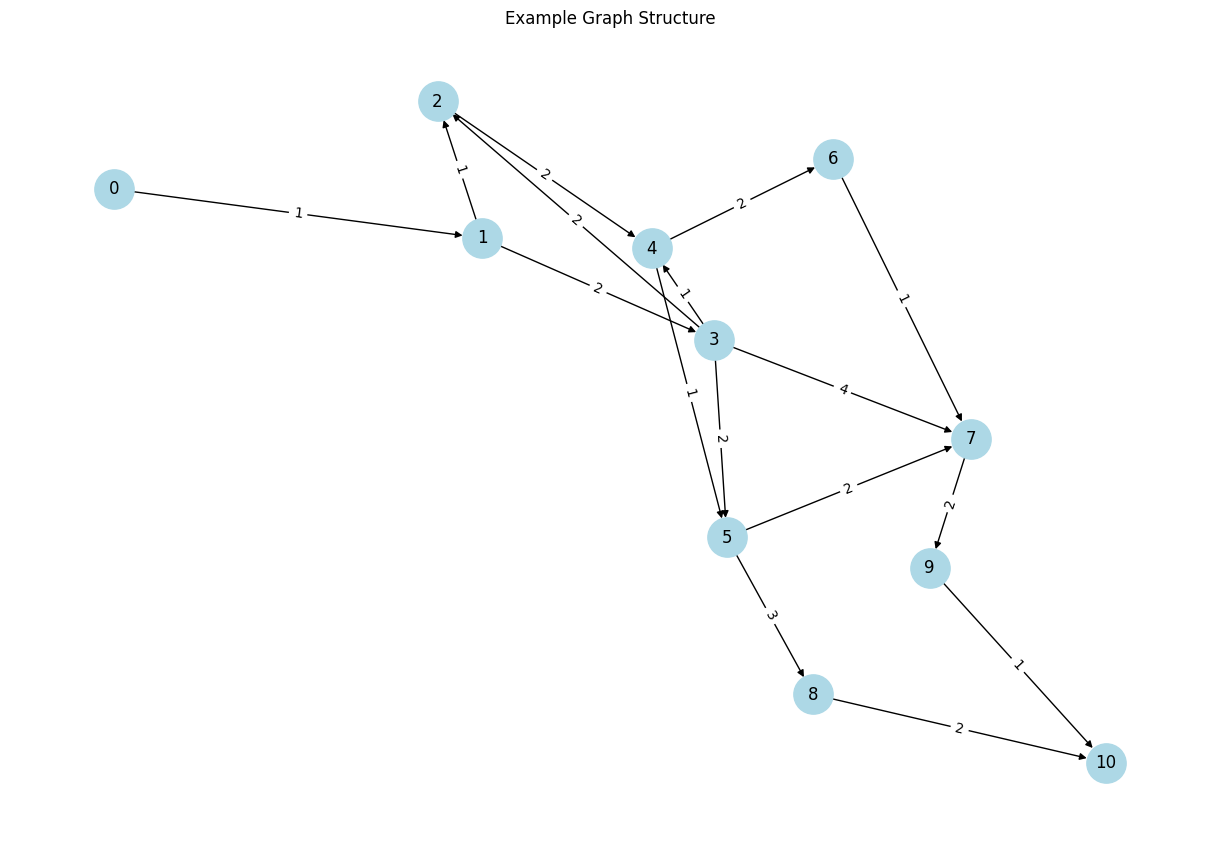

In [4]:
# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Example Graph Structure")
plt.show()

In [5]:
#4. Run ABC Algorithm
# Initialize ABC
abc = ArtificialBeeColony(G, num_bees=53, max_iterations=500)

# Run optimization
start_time = datetime.datetime.now()
best_path, best_fitness = abc.run(patience=12)
end_time = datetime.datetime.now()

# Convert test data to DataFrame
results_df = pd.DataFrame(abc.test_data, columns=["Iteration", "Fitness", "Test Cases"])

In [6]:
# ## 5. Display Results

print("Optimization Results:")
print(f"Optimal Path: {best_path}")
print(f"Path Fitness: {best_fitness:.2f}")
print(f"Total Execution Time: {(end_time - start_time).total_seconds():.2f} seconds")

Optimization Results:
Optimal Path: [0, 1, 3, 2, 4, 6, 7, 9, 5, 8, 10]
Path Fitness: 320.41
Total Execution Time: 2.18 seconds


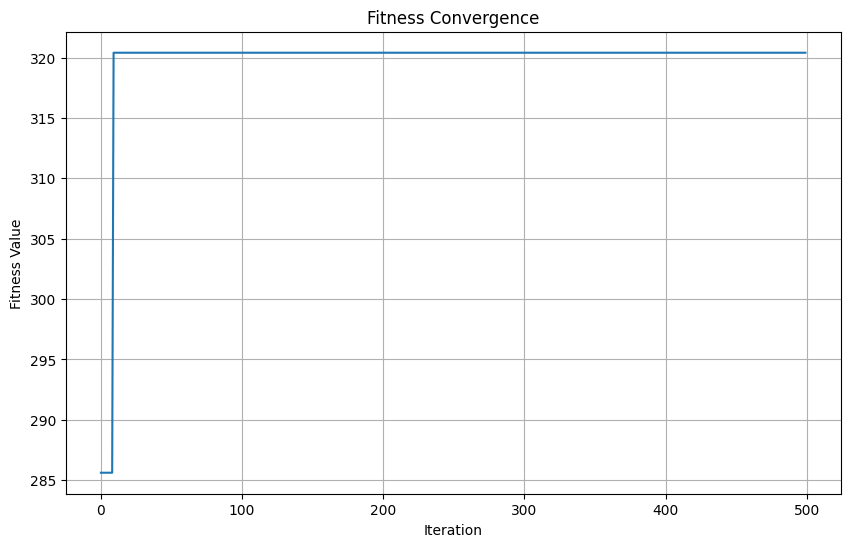

In [7]:
# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(results_df["Iteration"], results_df["Fitness"])
plt.title("Fitness Convergence")
plt.xlabel("Iteration")
plt.ylabel("Fitness Value")
plt.grid(True)
plt.show()

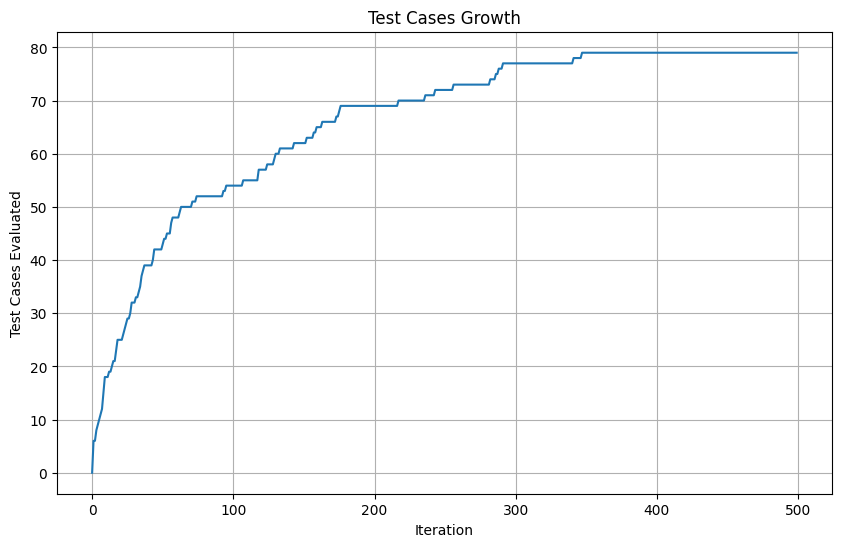

In [8]:
# Display test cases growth
plt.figure(figsize=(10, 6))
plt.plot(results_df["Iteration"], results_df["Test Cases"])
plt.title("Test Cases Growth")
plt.xlabel("Iteration")
plt.ylabel("Test Cases Evaluated")
plt.grid(True)
plt.show()